In [3]:
import pandas as pd

df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
print(df['ocean_proximity'].value_counts())

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64


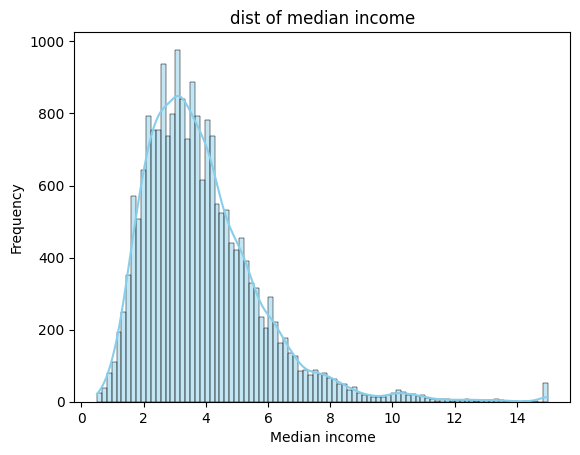

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['median_income'], kde=True, color="skyblue")
plt.title("dist of median income")
plt.xlabel('Median income')
plt.ylabel("Frequency")
plt.show()

In [8]:
from scipy.stats import skew, kurtosis
print("skewness", skew(df["median_income"]))
print("kurtosis", kurtosis(df["median_income"]))

skewness 1.64653702990008
kurtosis 4.951033760409659


In [9]:
df['total_bedrooms'].isnull().sum()

np.int64(207)

<Axes: >

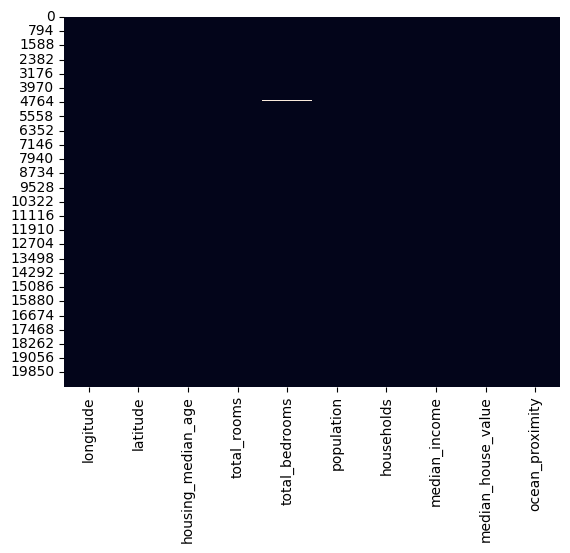

In [10]:
sns.heatmap(df.isnull(), cbar = False)

In [11]:
df[df['total_bedrooms'].isnull()]['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     102
INLAND         55
NEAR OCEAN     30
NEAR BAY       20
Name: count, dtype: int64

In [12]:
meadian_bedrooms = df['total_bedrooms'].median()
df['total_bedrooms'] = df['total_bedrooms'].fillna(meadian_bedrooms)

In [13]:
df.describe()['total_rooms']

count    20640.000000
mean      2635.763081
std       2181.615252
min          2.000000
25%       1447.750000
50%       2127.000000
75%       3148.000000
max      39320.000000
Name: total_rooms, dtype: float64

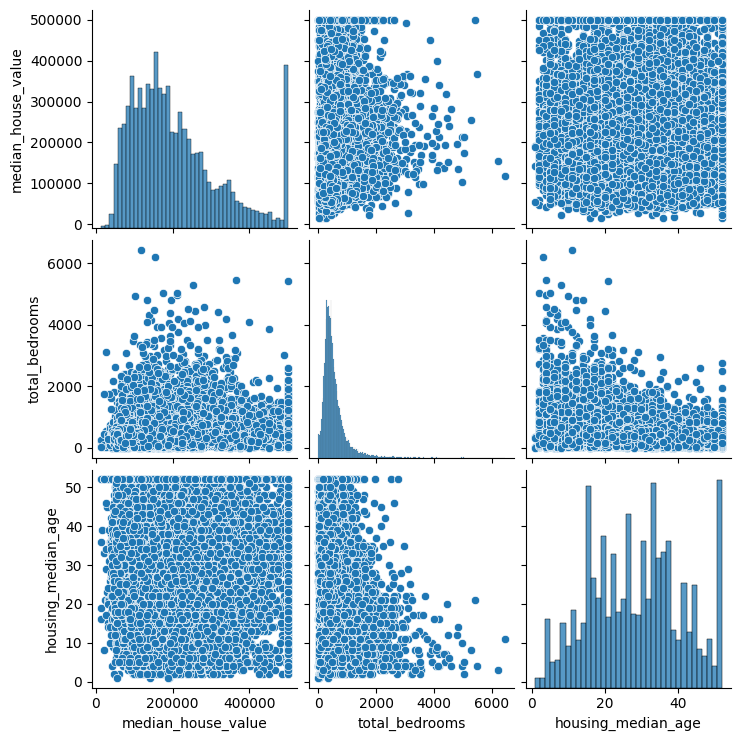

In [14]:
import seaborn as sns
sns.pairplot(df, vars=['median_house_value', 'total_bedrooms', 'housing_median_age'])


In [15]:
df[['median_house_value', 'total_bedrooms', 'housing_median_age']].corr()


,median_house_value,total_bedrooms,housing_median_age
median_house_value,1.000000,0.049457,0.105623
total_bedrooms,0.049457,1.000000,-0.319026
housing_median_age,0.105623,-0.319026,1.000000


<Axes: xlabel='ocean_proximity', ylabel='median_house_value'>

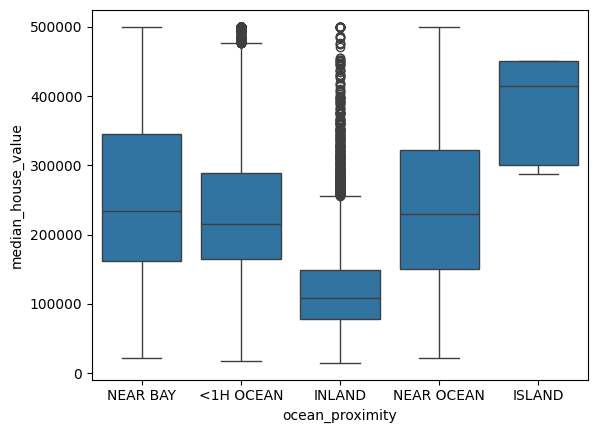

In [16]:
import matplotlib.pyplot as plt
sns.boxplot(x='ocean_proximity', y='median_house_value', data=df)

<Axes: xlabel='longitude', ylabel='latitude'>

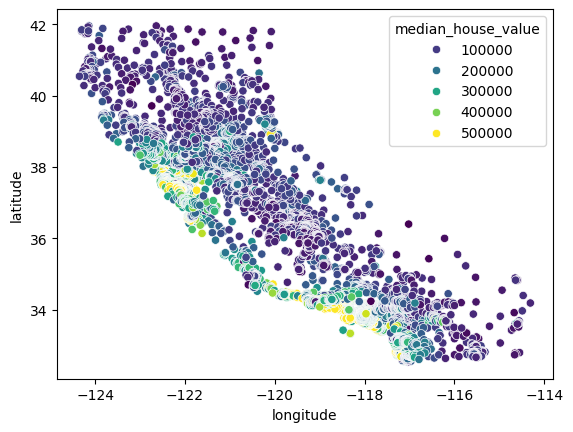

In [17]:
sns.scatterplot(x='longitude', y='latitude', hue='median_house_value', data=df, palette='viridis')

In [18]:
df['is_near_ocean'] = df['ocean_proximity'].apply(lambda x:1 if x in ['NEAR BAY','NEAR OCEAN'] else 0)

In [19]:
df.groupby('is_near_ocean')['median_house_value'].describe()


,count,mean,std,min,25%,50%,75%,max
is_near_ocean,,,,,,,,
0,15692.0,192003.081507,108843.352134,14999.0,111300.0,166900.0,241200.0,500001.0
1,4948.0,253959.520210,122719.775299,22500.0,156300.0,231650.0,335300.0,500001.0


<Axes: xlabel='is_near_ocean', ylabel='median_house_value'>

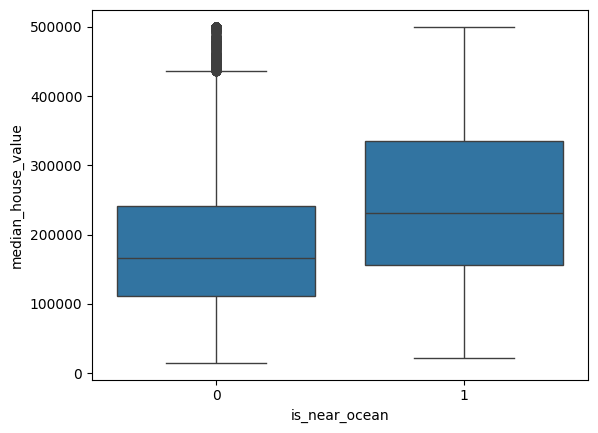

In [20]:
import seaborn as sns
sns.boxplot(x='is_near_ocean', y='median_house_value', data=df)


In [21]:
from scipy.stats import ttest_ind

group_0 = df[df['is_near_ocean'] == 0]['median_house_value']
group_1 = df[df['is_near_ocean'] == 1]['median_house_value']

t_stat, p_val = ttest_ind(group_0, group_1)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")


T-statistic: -33.830, P-value: 0.000


In [25]:
df['housing_median_age'].describe()


count    20640.000000
mean        28.639486
std         12.585558
min          1.000000
25%         18.000000
50%         29.000000
75%         37.000000
max         52.000000
Name: housing_median_age, dtype: float64

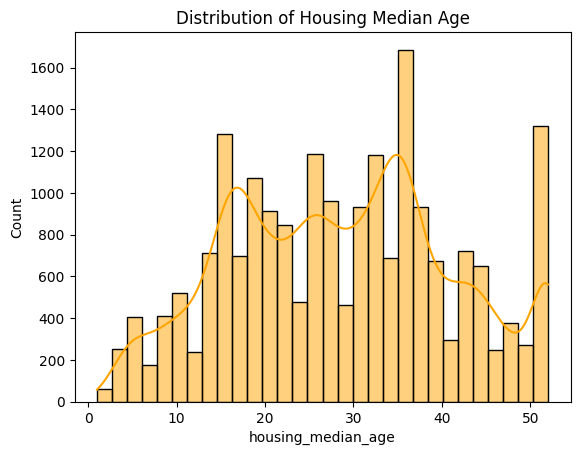

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df['housing_median_age'], bins=30, kde=True, color='orange')
plt.title("Distribution of Housing Median Age")
plt.show()


Text(0.5, 1.0, 'House Value vs Housing Median Age')

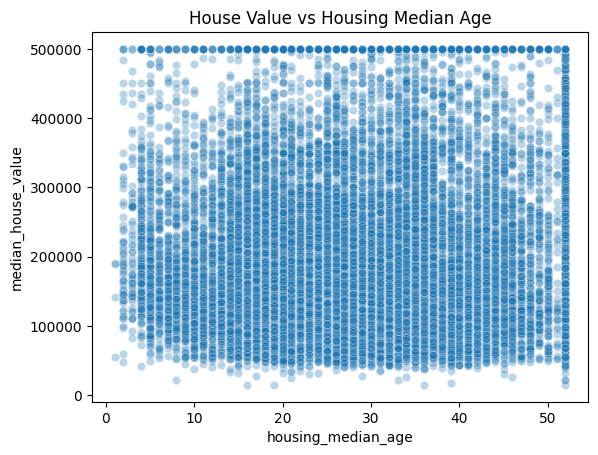

In [27]:
sns.scatterplot(x='housing_median_age', y='median_house_value', data=df, alpha=0.3)
plt.title("House Value vs Housing Median Age")


In [28]:
df[['housing_median_age', 'median_house_value']].corr()


,housing_median_age,median_house_value
housing_median_age,1.000000,0.105623
median_house_value,0.105623,1.000000


In [30]:
df['housing_median_age'] = df['housing_median_age'].apply(lambda x: 52 if x >= 52 else x)

In [31]:
df['age_group'] = pd.cut(df['housing_median_age'],
                         bins=[0, 10, 20, 30, 40, 52],
                         labels=['Very New', 'New', 'Mid', 'Old', 'Very Old'])


<Axes: xlabel='age_group', ylabel='median_house_value'>

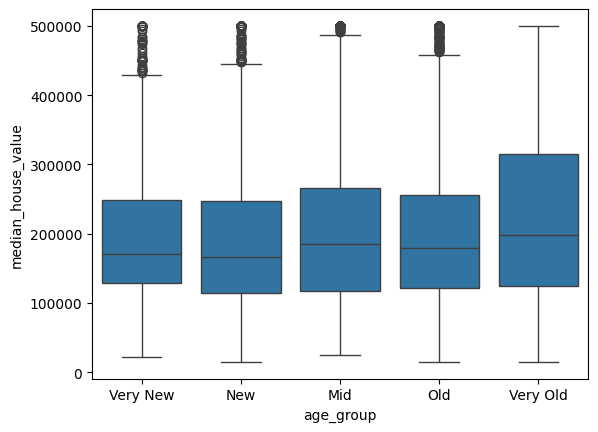

In [32]:
sns.boxplot(x='age_group', y='median_house_value', data=df)


In [33]:
df['total_bedrooms'].describe()


count    20640.000000
mean       536.838857
std        419.391878
min          1.000000
25%        297.000000
50%        435.000000
75%        643.250000
max       6445.000000
Name: total_bedrooms, dtype: float64

In [34]:
df['total_bedrooms'].isnull().sum()


np.int64(0)

<Axes: xlabel='total_bedrooms', ylabel='median_house_value'>

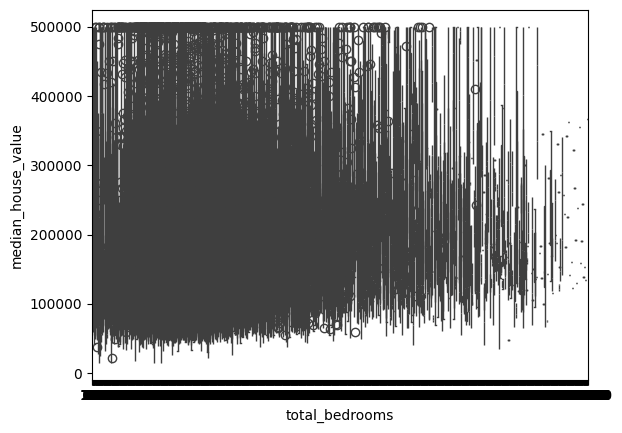

In [35]:
import seaborn as sns
sns.boxplot(x='total_bedrooms', y='median_house_value', data=df)

<Axes: xlabel='bedroom_bin', ylabel='median_house_value'>

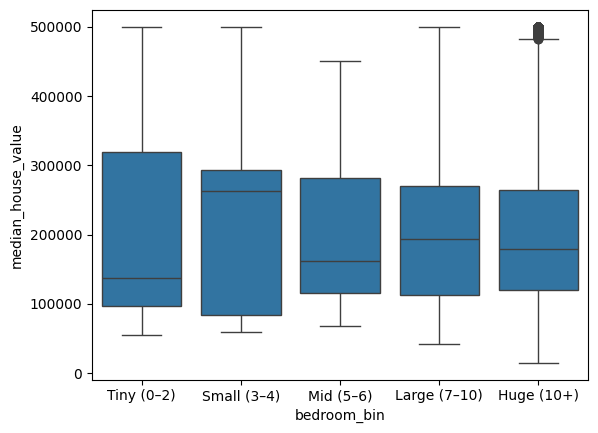

In [36]:
# Bin bedrooms into categories
df['bedroom_bin'] = pd.cut(df['total_bedrooms'], bins=[0, 2, 4, 6, 10, df['total_bedrooms'].max()],
                           labels=['Tiny (0–2)', 'Small (3–4)', 'Mid (5–6)', 'Large (7–10)', 'Huge (10+)'])

sns.boxplot(x='bedroom_bin', y='median_house_value', data=df)


In [37]:
df['rooms_per_household'] = df['total_rooms'] / df['households']


<Axes: xlabel='rooms_per_household', ylabel='median_house_value'>

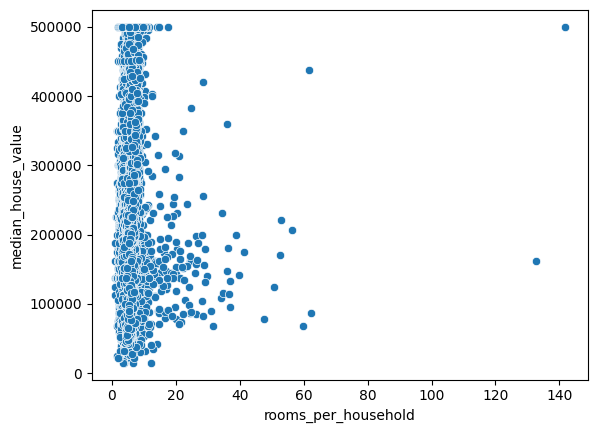

In [38]:
sns.scatterplot(x='rooms_per_household', y='median_house_value', data=df)


<Axes: xlabel='rph_bin', ylabel='median_house_value'>

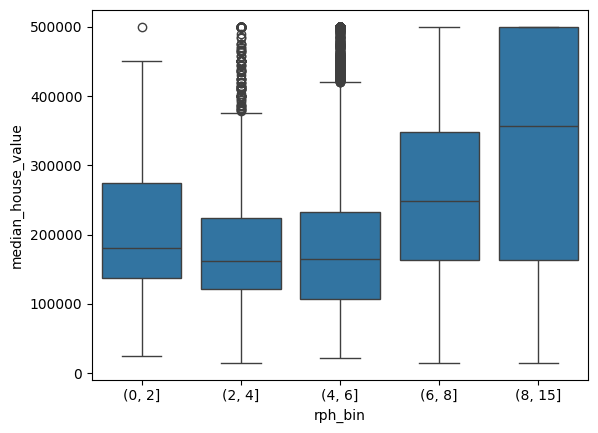

In [39]:
df['rph_bin'] = pd.cut(df['rooms_per_household'], bins=[0, 2, 4, 6, 8, 15])
sns.boxplot(x='rph_bin', y='median_house_value', data=df)


In [40]:
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']


<Axes: xlabel='bedrooms_per_room', ylabel='Count'>

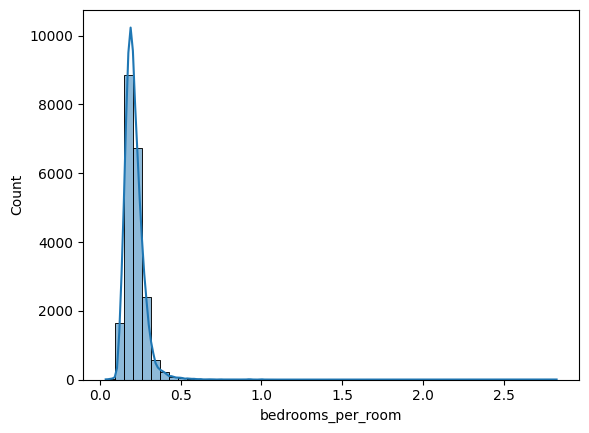

In [41]:
sns.histplot(df['bedrooms_per_room'], bins=50, kde=True)


In [42]:
df['population_per_household'] = df['population'] / df['households']



<Axes: xlabel='population_per_household', ylabel='Count'>

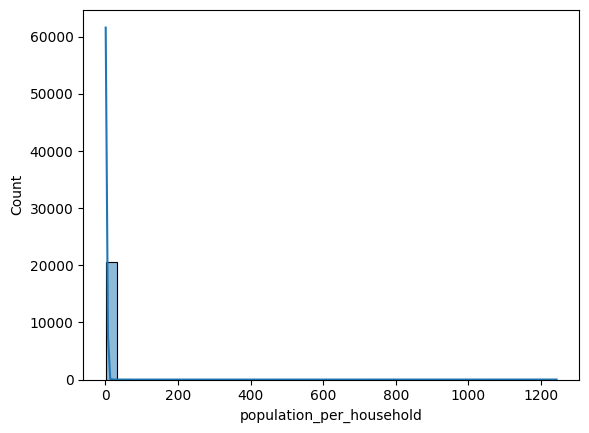

In [43]:
sns.histplot(df['population_per_household'], bins=40, kde=True)


In [44]:
df[['population_per_household', 'median_house_value']].corr()


,population_per_household,median_house_value
population_per_household,1.000000,-0.023737
median_house_value,-0.023737,1.000000


In [45]:
import numpy as np
df['log_house_value'] = np.log1p(df['median_house_value'])


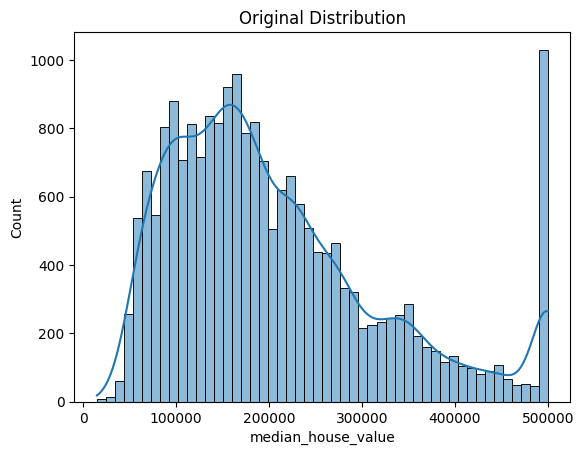

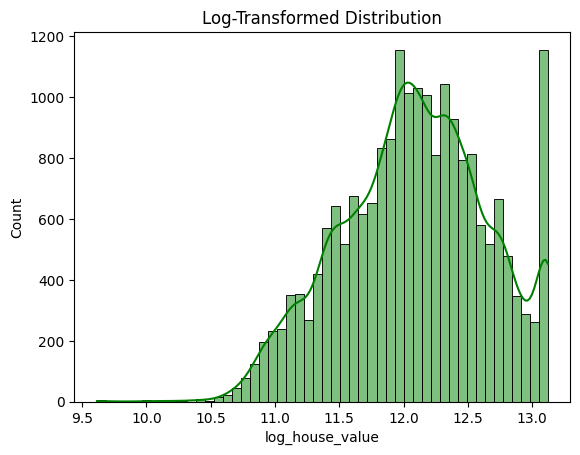

In [46]:
sns.histplot(df['median_house_value'], bins=50, kde=True)
plt.title("Original Distribution")
plt.show()

sns.histplot(df['log_house_value'], bins=50, kde=True, color='green')
plt.title("Log-Transformed Distribution")
plt.show()


In [47]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,is_near_ocean,age_group,bedroom_bin,rooms_per_household,rph_bin,bedrooms_per_room,population_per_household,log_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,1,Very Old,Huge (10+),6.984127,"(6, 8]",0.146591,2.555556,13.022766
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,1,Mid,Huge (10+),6.238137,"(6, 8]",0.155797,2.109842,12.789687
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,1,Very Old,Huge (10+),8.288136,"(8, 15]",0.129516,2.802260,12.771673
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,1,Very Old,Huge (10+),5.817352,"(4, 6]",0.184458,2.547945,12.740520
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,1,Very Old,Huge (10+),6.281853,"(6, 8]",0.172096,2.181467,12.743154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,0,Mid,Huge (10+),5.045455,"(4, 6]",0.224625,2.560606,11.265758
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,0,New,Huge (10+),6.114035,"(6, 8]",0.215208,3.122807,11.252872
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,0,New,Huge (10+),5.205543,"(4, 6]",0.215173,2.325635,11.432810
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,0,New,Huge (10+),5.329513,"(4, 6]",0.219892,2.123209,11.346883


,is_near_ocean,median_house_value
is_near_ocean,1.00000,0.22922
median_house_value,0.22922,1.00000


In [51]:
features = [
    'median_income',
    'housing_median_age',
    'total_bedrooms',
    'is_near_ocean',
    'latitude',
    'longitude',
    'rooms_per_household',
    'bedrooms_per_room',
    'population_per_household'
]

target = 'log_house_value'


<Axes: >

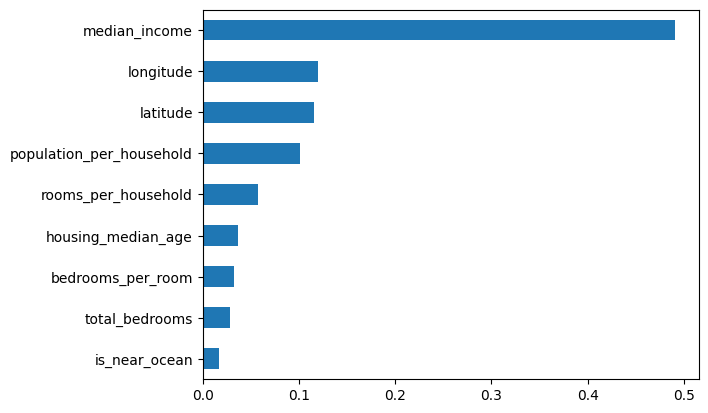

In [52]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(df[features], df[target])

importances = pd.Series(model.feature_importances_, index=features)
importances.sort_values().plot(kind='barh')


In [53]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


In [54]:
y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)  # back to original scale
y_true = np.expm1(y_test)      # if you used log_house_value as y


NameError: name 'X_test' is not defined

In [55]:
from sklearn.model_selection import train_test_split

features = ['median_income', 'housing_median_age', 'total_bedrooms',
            'is_near_ocean', 'latitude', 'longitude',
            'rooms_per_household', 'bedrooms_per_room', 'population_per_household']

X = df[features]
y = df['log_house_value']  # log-transformed target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)



RandomForestRegressor(random_state=42)

In [57]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred_log = model.predict(X_test)
y_pred = np.expm1(y_pred_log)
y_true = np.expm1(y_test)

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

print(f"MAE: ${mae:,.0f}")
print(f"RMSE: ${rmse:,.0f}")
print(f"R² Score: {r2:.2f}")


MAE: $31,676
RMSE: $51,157
R² Score: 0.80
